<a href="https://colab.research.google.com/github/Tstrebe2/predicting-text-difficulty/blob/tim-updates/tim-dchall-eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dale Chall Word List EDA

In [1]:
import sys

!{sys.executable} -m pip install spacy -U -q
!{sys.executable} -m spacy download en_core_web_lg -q

2022-09-26 00:39:19.774343: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
     |████████████████████████████████| 587.7 MB 9.3 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [5]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

In [35]:
urls = ['https://raw.githubusercontent.com/Tstrebe2/predicting-text-difficulty/main/assets/dale_chall.txt',
        'https://raw.githubusercontent.com/Tstrebe2/predicting-text-difficulty/main/assets/WikiLarge_Train.csv']

d_chall = set(requests.get(urls[0]).text.split('\r'))

wiki_df_train = pd.read_csv(urls[1])

In [66]:
tokenizer = lambda x: x.split(' ')
vectorizer = CountVectorizer(tokenizer=tokenizer)
X = vectorizer.fit_transform(wiki_df_train['original_text'])

In [68]:
feature_array = np.array(vectorizer.get_feature_names_out())
ix = np.where(np.array([True if f in d_chall else False for f in feature_array]))[0]
wiki_df_train['d_chall'] = np.array(X[:, ix].sum(axis=1))/np.array(X.sum(axis=1))

In [69]:
wiki_df_train

,original_text,label,d_chall
0,There is manuscript evidence that Austen conti...,1,0.488372
1,"In a remarkable comparative analysis , Mandaea...",1,0.260870
2,"Before Persephone was released to Hermes , who...",1,0.565217
3,Cogeneration plants are commonly found in dist...,1,0.256410
4,"Geneva -LRB- , ; , ; , ; ; -RRB- is the second...",1,0.361111
...,...,...,...
416763,A Duke Nukem 3D version has been sold for Xbox...,0,0.411765
416764,"However , it is becoming replaced as a method ...",0,0.500000
416765,There are hand gestures in both Hindu and Budd...,0,0.545455
416766,"If it is necessary to use colors , try to choo...",0,0.619048


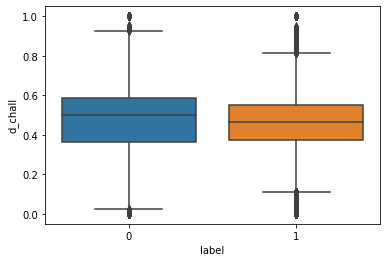

In [71]:
import seaborn as sns

sns.boxplot(data=wiki_df_train, x='label', y='d_chall')

In [73]:
[w for w in d_chall if w not in set(feature_array)]

['scab',
 'cluck',
 'Saturday',
 'gobble',
 'March',
 'afar ',
 'groan',
 "hadn't",
 'beefsteak',
 'tardy',
 'spook',
 "shan't",
 "we've",
 'afternoon ',
 'catbird',
 'aim ',
 'awaken',
 'carelessness',
 'afterward ',
 'ouch',
 "we're",
 'waken',
 'rosebud',
 'doorknob',
 'along ',
 'God',
 "won't",
 "couldn't",
 'Thursday',
 'agree ',
 'Friday',
 'coffeepot',
 'ahead ',
 'quack',
 'woolen',
 "she'd",
 'coop',
 'redbreast',
 'stillness',
 'States',
 'firecracker',
 "who's",
 "shouldn't",
 'April',
 'mamma',
 'bedbug',
 "who'd",
 'I',
 'cannot',
 'airship ',
 'United',
 'ago ',
 'account ',
 'gladly',
 "isn't",
 'pocketbook',
 'rowboat',
 "we'd",
 'christen',
 'alike ',
 "here's",
 'schoolroom',
 'America',
 'cranky',
 'January',
 'airport ',
 "doesn't",
 'armful',
 'buckle',
 "I've",
 'after ',
 'almost ',
 'alarm ',
 'again ',
 'nibble',
 'haystack',
 'homely',
 'September',
 "wasn't",
 'thimble',
 'drowsy',
 "can't",
 'American',
 'sprinkle',
 'sob',
 'cob',
 'Miss',
 'redbird',
 'al